# ML Lab Week 4 by Smeet 200968236
## Excercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
fuel = pd.read_csv("FuelConsumption.csv")
fuel

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
fuel_selected = fuel[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
fuel_selected

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [4]:
fuel_selected.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

Text(0, 0.5, 'CO2 Emissions')

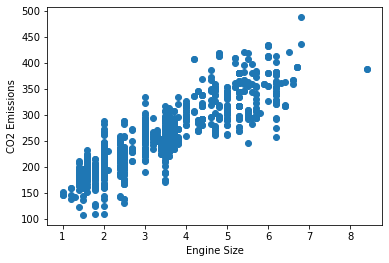

In [5]:
df1 = fuel_selected[['ENGINESIZE','CO2EMISSIONS']]
plt.scatter(df1['ENGINESIZE'], df1['CO2EMISSIONS'])
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [6]:
x = fuel_selected.drop('CO2EMISSIONS', axis=1)
y = fuel_selected['CO2EMISSIONS']
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [7]:
r2 = []
mean = []
rss = []

In [9]:
for deg in range(2,7):
    print("Degree:")
    print(deg)
    
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(x_train, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(x_test)
    
    print("Mean Abs Error:")
    print(mean_absolute_error(y_test,poly_reg_y_predicted))
    mean.append(mean_absolute_error(y_test,poly_reg_y_predicted))
    
    df = pd.DataFrame({'Actual': y_test, 'Predicted':poly_reg_y_predicted})
    print("RSS:")
    print(np.sum(np.square(df['Predicted'] - df['Actual'])))
    rss.append(np.sum(np.square(df['Predicted'] - df['Actual'])))
    
    print("R2 Score:")
    print(r2_score(y_test,poly_reg_y_predicted))
    r2.append(r2_score(y_test,poly_reg_y_predicted))
   
    print("")

Degree:
2
Mean Abs Error:
10.471619938642183
RSS:
104205.59159322093
R2 Score:
0.9195169824283629

Degree:
3
Mean Abs Error:
10.23071157936686
RSS:
87722.80578346376
R2 Score:
0.932247434985407

Degree:
4
Mean Abs Error:
8.250441311587103
RSS:
76656.43304324882
R2 Score:
0.9407945298014105

Degree:
5
Mean Abs Error:
8.236270805602803
RSS:
74523.76541866423
R2 Score:
0.9424416921396269

Degree:
6
Mean Abs Error:
97.25498166546802
RSS:
614427291.0393564
R2 Score:
-473.5519094047439



Text(0.5, 1.0, 'RMSE vs Degree')

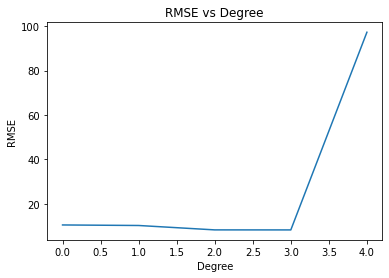

In [13]:
plt.plot(mean)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs Degree")

Text(0.5, 1.0, 'RSS vs Degree')

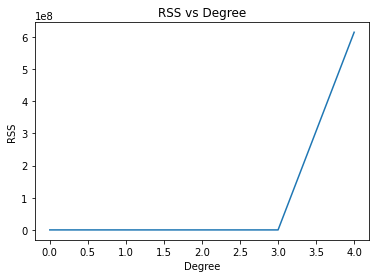

In [14]:
plt.plot(rss)
plt.xlabel("Degree")
plt.ylabel("RSS")
plt.title("RSS vs Degree")

Text(0.5, 1.0, 'R2 vs Degree')

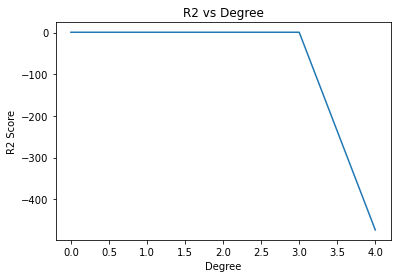

In [15]:
plt.plot(r2)
plt.xlabel("Degree")
plt.ylabel("R2 Score")
plt.title("R2 vs Degree")

#### From the above graphs of Mean Absolte Error, RSS and R2 score, we can clearly see that the model is best when polynomial of degree 3 is used for regression